## Problem Statement

### Identify what affects students' exam score

### What to do in a Exploratory Data Analysis (EDA)

1. Check and clean the data (pre-processing)
    - check for any duplicate
    - check if all input are not empty --> check for empty/null values 

2. Feature engineering --> create/ drop features (fields/columns)

#### Part 1:  Check and clean the data (pre-processing)

In [81]:
#import libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pip install pandas
# pip install <library>

In [82]:
# read csv file
df = pd.read_csv('/Users/raphaeloen/Desktop/CS/cs portfolio/exam score/student_exam_scores.csv')

In [83]:
#display/print first 5 rows of data (default)
df.head()

#display/print first 2 rows of data 
# df.head(2)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [84]:
#display/print last 5 rows of data (default)
df.tail()

#display/print last 2 rows of data 
#df.tail(2)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0
199,S200,10.2,6.3,97.4,68,37.8


In [85]:
# number of rows, number of columns
df.shape

(200, 6)

In [86]:
#find data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [87]:
# Check for duplicates in the whole data table
df.duplicated().sum()

np.int64(0)

In [88]:
# Check for any duplicates in 'student_id' column
df['student_id'].duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset.

In [89]:
# Check for missing data
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

There are no null values inside the dataset

#### Part 2: Feature engineering --> create/ drop features (fields/columns)

In [90]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [91]:
df['diff'] = df['exam_score'] - df['previous_scores']

In [92]:
df.head(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,diff
0,S001,8.0,8.8,72.1,45,30.2,-14.8
1,S002,1.3,8.6,60.7,55,25.0,-30.0
2,S003,4.0,8.2,73.7,86,35.8,-50.2
3,S004,3.5,4.8,95.1,66,34.0,-32.0
4,S005,9.1,6.4,89.8,71,40.3,-30.7


In [93]:
# Drop column 'student_id'
df = df.drop(columns=['student_id', 'previous_scores', 'exam_score'])

In [94]:
df.head()

,hours_studied,sleep_hours,attendance_percent,diff
0,8.0,8.8,72.1,-14.8
1,1.3,8.6,60.7,-30.0
2,4.0,8.2,73.7,-50.2
3,3.5,4.8,95.1,-32.0
4,9.1,6.4,89.8,-30.7


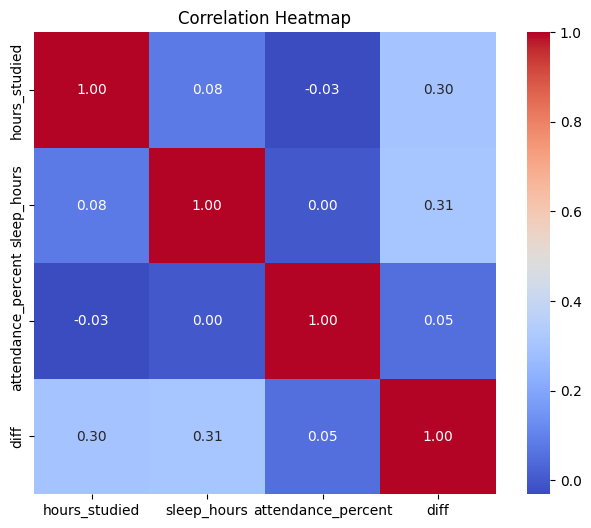

In [95]:
# 1. Calculate the correlation matrix
correlation_matrix = df.corr()

# 2. Create the heatmap
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')

# 3. Display the plot
plt.show()

- Correlation > 0 --> Positive corelated --> When one increase, another increases, vice versa.
- Correlation < 0 --> Negative corelated --> When one increase, another decreases, vice versa.
- Correlation = 0 --> Not corelated --> Both can move in same / different direction.

'hours_studied' has a positive corelation with 'diff' of 0.3. This means that when the hours studied increases, there will be an improvement in the score. This shows that studying is important for students.

'sleep_hours' has a positive corelation with 'diff' of 0.31. This means that when the hours of sleep increases, there will be an improvement in the score. This shows that sleep is important for students.

'attendance_percent' has a weak positive corelation with 'diff' of 0.05. This means that when the attendance of a student increases, there will be a slight improvement in the score. This shows that attendance is not an important for students.